In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import colors as clr
from matplotlib.lines import Line2D
import copy
import random
import time

In [2]:
#SET EPS AND KB VALUE
eps = 1
kb = 1

In [3]:
def initialise_state(N): #N is the grid dimension (in the above example, N=4)
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    grid = np.ones((N,N,2),dtype=int)
    
    return np.array(grid)


In [4]:
def plot_vector(p1,p2,num):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    if num>4:
        w = 0.12/num
        h=0.9/num
    else:
        w = 0.03
        h=0.2
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    dx = dp[0]
    dy = dp[1]

    plt.arrow(p1[0], p1[1],
                 dx / 2, dy / 2,
                 width=w, head_width=h,
                 facecolor="k",
                 zorder=0)

    plt.arrow(p1[0] + dx / 2,
                 p1[1] + dy / 2,
                 dx / 2, dy / 2,
                 width=w, head_width=0,
                 facecolor="k",
                 zorder=0)

def plot_vector_old(p1,p2):
    '''
    DEPRECATED: As of 5th June 2020.
    Author: Siddharth Chaini
    ~Function Description~
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    plt.quiver(p1[0], p1[1], dp[0], dp[1],angles='xy', scale_units='xy', scale=1, headwidth = 5, headlength = 7)

def get_coord_list(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    coord_list=[]
    num = len(arr)
    for i in range(num):
        temp_coord = []
        for j in range(num):
            current_elems = arr[i][j]
            xpt = (num-1)-i
            ypt = j
            temp_coord.append((xpt,ypt))
        coord_list.append(temp_coord)
    return coord_list

def visualise_2d_model(arr,savefig=False,savename=".temp",show=True):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    num = len(arr)
    if num<4:
        mksize = 35/num 
    else:
        mksize=(35/num)+0.5
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

#             plt.plot(x_current,y_current,'ob')
            
            plt.plot(x_current,y_current,
                        marker="o", markersize=mksize, markeredgecolor="k",
                        markerfacecolor="yellowgreen",
                        zorder=1)

            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1],num)
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current],num)

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current],num)
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current],num)

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1],num)
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current],num)

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current],num)
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current],num)
    plt.xlim(-1,num)
    plt.ylim(-1,num)
    plt.axis('off')
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()

In [5]:
def create_6_vertex_configs():
    
    configlist = [(1,1,-1,-1),
            (-1,-1,1,1),
            (1,-1,-1,1),
            (-1,1,1,-1),
            (-1,1,-1,1),
            (1,-1,1,-1)]
    
    for i in range(len(configlist)):
        config=configlist[i]
        plt.axes().set_aspect('equal')
        if config[0]==1:
            plot_vector([0,0],[0,1],5) #Up
        else:
            plot_vector([0,1],[0,0],5) #Up
        if config[1]==1:
            plot_vector([0,0],[1,0],5) #Right
        else:
            plot_vector([1,0],[0,0],5) #Right
        if config[2]==-1:
            plot_vector([0,-1],[0,0],5) #Down
        else:
            plot_vector([0,0],[0,-1],5)
        if config[3]==-1:
            plot_vector([-1,0],[0,0],5) #Left
        else:
            plot_vector([0,0],[-1,0],5)
        plt.plot(0,0,
                    marker="o", markersize=35, markeredgecolor="k",
                    markerfacecolor="yellowgreen",
                    zorder=1)
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.axis('off')
        plt.show()
        plt.close()

In [7]:
def check_config(arr):
    '''
    Author: Tanmay Bhore
    ~Function Description~
    '''
    flag=True
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            
            left_neighbour_right_state = arr[i][j-1][1]


            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            
            if (current_up_state + current_right_state + current_left_state + current_down_state) != 0:
                flag=False
                break
    return flag

# LONG LOOP

In [8]:
def long_loop(arr2, verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pt =(n1,n2)
    prev_choice=None
    
    while True:
        iters+=1
        if n1==inital_pt[0] and n2==inital_pt[1] and iters!=1:
            if verbose:
                print(f"Completed in {iters} iterations.")
#             assert(check_config(arr))
            break
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]

        if prev_choice =="right":
            forbidden_choice="left"
        if prev_choice =="up":
            forbidden_choice="down"
        if prev_choice =="left":
            forbidden_choice="right"
        if prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None


        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break

        prev_choice=out_choice

        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue



    return arr

In [9]:
def count_states(num,error_threshold,return_dict = False,verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    if not (error_threshold<=100 and error_threshold>0):
        print("Error! Please input error_threshold as a value between 0 and 100")
        assert (error_threshold<=100 and error_threshold>0)
    state_dict={}
    oldarr = long_loop(initialise_state(num), verbose=False)
    good_iterations = 0           #Iterations that gave us a new state, so good.
    bad_iterations = 0               #Iterations that gave us an already found state,so a waste and hence bad.
    while True:
        newarr = long_loop(oldarr,verbose=False)
        name =arr_to_string(newarr)
        if name not in state_dict:
            count_repetitions=0
            state_dict[name]=1
            good_iterations+=1
        else:
            bad_iterations+=1
            count_repetitions+=1
            state_dict[name]+=1
        percent_approx_err=good_iterations*100/(good_iterations+bad_iterations)
        if verbose:
            print(f"Good iterations = {good_iterations} and bad iterations = {bad_iterations} and Error % = {percent_approx_err}", end="\r",flush=True)
        if percent_approx_err < error_threshold:
            break
        oldarr=newarr
    if return_dict:
        return len(state_dict),state_dict
    else:
        return len(state_dict)

In [10]:
def state2to4(arr):
    '''
    Author: Siddharth Chaini
    Examine once.
    ~Function Description~
    '''
    fourstatearr=np.zeros((arr.shape[0],arr.shape[1],4))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            left_neighbour_right_state = arr[i][j-1][1]
            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            fourstatearr[i][j][0] = current_up_state
            fourstatearr[i][j][1] = current_right_state
            fourstatearr[i][j][2] = current_down_state
            fourstatearr[i][j][3] = current_left_state

    return fourstatearr

In [11]:
#Rot 90 anticlock
#Up becomes left, left becomes down, down becomes right, right becomes up
def rot90_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,1)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_right_state
            new_right_state = current_down_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

#Rot 180 anticlock
#Up becomes down, left becomes right, down becomes up, right becomes left
def rot180_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,2)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_down_state
            new_right_state = current_left_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

#Rot 270 anticlock
#Up becomes right, left becomes up, down becomes left, right becomes down
def rot270_anticlock(arr2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,3)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_left_state
            new_right_state = current_up_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr.astype(int)

In [12]:
#Flip horizontally
#Up becomes right, left becomes up, down becomes left, right becomes down
def hor_flip(arr2):
    '''
    Author: Siddharth Chaini and Vipin Khade
    ~Function Description~
    '''
    arr = np.flip(arr2,1)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_left_state = arr[i][j][1]
            
            right_neighbour_left_state = arr[i][(j+1)%num][1]
            current_right_state = - (right_neighbour_left_state)

            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr.astype(int)

#Flip vertically
#Up becomes right, left becomes up, down becomes left, right becomes down
def ver_flip(arr2):
    '''
    Author: Siddharth Chaini and Vipin Khade
    ~Function Description~
    '''
    arr = np.flip(arr2,0)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_down_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            
            upper_neighbour_down_state = arr[i-1][j][0]
            current_up_state = - (upper_neighbour_down_state)
            
            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr.astype(int)


In [13]:
def flip_secondary_diag(arr2):
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    N = len(arr)
    for i in range(N):
        for j in range(N):
            if (i+j)<=N-1:
                dist = N-(i+j+1)
                arr[i][j][0], arr[i+dist][j+dist][0], arr[i][j][1], arr[i+dist][j+dist][1] = arr[i+dist][j+dist][1], arr[i][j][1], arr[i+dist][j+dist][0], arr[i][j][0]                
    return arr.astype(int)

def flip_primary_diag(arr2):
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    N = len(arr)
    arr = rot90_anticlock(flip_secondary_diag(rot270_anticlock(arr)))
    return arr.astype(int)


In [14]:
def get_all_column_translations(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[:,0:i].reshape(N,-1,2)
        a2 = arr[:,i:].reshape(N,-1,2)
        res = np.hstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

In [15]:
def get_all_row_translations(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[0:i,:].reshape(-1,N,2)
        a2 = arr[i:,:].reshape(-1,N,2)
        res = np.vstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

In [16]:
def arr_to_string(arr2):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    name = ' '.join(map(str, arr.flatten())).replace(' ','')
    return name

In [17]:
def string_to_arr(s):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    replaced_str = s.replace("-1","0")
    arr=[]
    for i in replaced_str:
        if i=='1':
            arr.append(1)
        elif i=="0":
            arr.append(-1)
        else:
            print("ERROR")
            assert(1==0)
    arr = np.array(arr)
    arr = arr.reshape(int(np.sqrt(len(arr)/2)),int(np.sqrt(len(arr)/2)),2)
    return arr

In [18]:
def remove_symmetries(all_names, verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    assert type(all_names)==list
    for i,given_name in enumerate(all_names):
        if verbose and i%100 ==0:
            print(f"Loading... {i}/{len(all_names)} done. Percent Completed = {100*i/len(all_names)}.", end="\r",flush=True)
#         print("*******************************")
#         print(f"Original Name = {given_name}")
        arr = string_to_arr(given_name)
        #Column Translation symmetries
        templist=get_all_column_translations(arr)
        for newarr in templist:
            name = arr_to_string(newarr)
#             print(f"Col Trans Name = {name}")
            if name in all_names[i+1:]:
                idx = all_names[i+1:].index(name) + i+1
                del all_names[idx]
                i = all_names.index(given_name)
        
        #Row Translation symmetries
        templist=get_all_row_translations(arr)
        for newarr in templist:
            name = arr_to_string(newarr)
#             print(f"Row Trans Name = {name}")
            if name in all_names[i+1:]:
                idx = all_names[i+1:].index(name) + i+1
                del all_names[idx]
                i = all_names.index(given_name)
        
        #Check 90 degree rotation symmetry
        name = arr_to_string(rot90_anticlock(arr))
#         print(f"Rot 90 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check 180 degree rotation symmetry
        name = arr_to_string(rot180_anticlock(arr))
#         print(f"Rot 180 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check 270 degree rotation symmetry
        name = arr_to_string(rot270_anticlock(arr))
#         print(f"Rot 270 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check horizontal flip symmetry
        name = arr_to_string(hor_flip(arr))
#         print(f"Flip Hor Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check vertical flip symmetry
        name = arr_to_string(ver_flip(arr))
#         print(f"Flip Ver Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check secondary diagonal flip symmetry
        name = arr_to_string(flip_secondary_diag(arr))
#         print(f"Sec Diag Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check primary diagonal flip symmetry
        name = arr_to_string(flip_primary_diag(arr))
#         print(f"Prim Diag Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)
    return all_names

# ENERGETIC: F1

In [68]:
arr = [[[-1,1],[-1,1],[1,-1],[-1,1]],
         [[-1,-1],[-1,-1],[-1,1],[1,-1]],
         [[-1,1],[-1,1],[1,1],[-1,1]],
         [[-1,1],[-1,1],[1,1],[-1,1]]]
arr = np.array(arr)

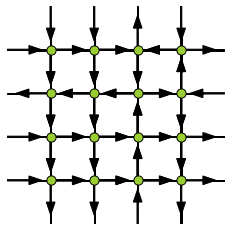

In [20]:
visualise_2d_model(arr)

In [21]:
def calculate_energy(arr,eps):
    '''
    Author: Vipin Khade
    ~Function Description~
    '''
    N = len(arr)
    s = 0
    for i in range(len(arr)):
        for j in range(len(arr)):  
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            lower_neighbour_up_state = arr[(i+1)%N][j][0] 
            left_neighbour_right_state = arr[i][j-1][1]
            if  current_up_state ==1 and lower_neighbour_up_state == -1 : 
                s+= 1
            elif current_right_state == 1 and left_neighbour_right_state == -1:
                s+= 1
    return (-s*eps)

In [22]:
def calculate_atom_config(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    tupdict = {
        (1,1,-1,-1):1,
        (-1,-1,1,1):2,
        (1,-1,-1,1):3,
        (-1,1,1,-1):4,
        (-1,1,-1,1):5,
        (1,-1,1,-1):6
    }
    num=len(arr)
    typearr = np.zeros((arr.shape[0],arr.shape[1]))
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]

            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

            tup = (current_up_state,current_right_state,current_down_state,current_left_state)
            atomtype = tupdict[tup]
            typearr[i][j] = atomtype
    return typearr.astype(int)

In [23]:
def calculate_energy_using_atom_config(arr, eps):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    atom_config_arr = calculate_atom_config(arr).flatten()
    energy = len(np.where(atom_config_arr==5)[0])+len(np.where(atom_config_arr==6)[0])
    energy = -1*energy * eps
    return energy

In [24]:
cmap = plt.cm.coolwarm
norm = clr.Normalize(vmin=-1, vmax=1)
hexlist = [clr.to_hex(cmap(norm(-1))),clr.to_hex(cmap(norm(0))),clr.to_hex(cmap(norm(1)))]
hexlist

['#3b4cc0', '#dddcdc', '#b40426']

In [25]:
def visualise_atom_config_with_bonds(arr,savefig=False,savename=".temp",show=True):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    num = len(arr)
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    atom_config_arr = calculate_atom_config(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

            if atom_config_arr[i][j]==5:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="cyan",
                            zorder=1)
            elif atom_config_arr[i][j]==6:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="magenta",
                            zorder=1)
            else:
                plt.plot(x_current,y_current,
                            marker="o", markersize=9, markeredgecolor="k",
                            markerfacecolor="gray",
                            zorder=1)                
            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1],num)
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current],num)

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current],num)
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current],num)

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1],num)
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current],num)

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current],num)
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current],num)
    plt.xlim(-1,num)
    plt.ylim(-1,num)
    plt.axis('off')
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()

In [26]:
def visualise_final_state(arr,title="",savefig=False,savename=".temp",show=True):
    '''
    Author: Siddharth Chaini and Tanmay Bhore
    ~Function Description~
    '''

    atom_config_arr = calculate_atom_config(arr)
    colordict = {1:0,2:0,3:0,4:0,5:-1,6:1}
    atom_config_arr_copy = np.copy(atom_config_arr)
    for key, val in colordict.items(): atom_config_arr_copy[atom_config_arr==key] = val
    flipped_arr = np.flip(atom_config_arr_copy,0)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    ax.set_aspect('equal')
    cmap = plt.cm.coolwarm
    norm = clr.Normalize(vmin=-1, vmax=1)
    hexlist = [clr.to_hex(cmap(norm(-1))),clr.to_hex(cmap(norm(0))),clr.to_hex(cmap(norm(1)))]

    legend_elements = [
                    Line2D([0], [0], marker='o', color='w', label='Type 1/2/3/4',markerfacecolor=hexlist[1], markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Type 5',markerfacecolor=hexlist[0], markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Type 6',markerfacecolor=hexlist[2], markersize=10)
                        ]
    ax.pcolormesh(flipped_arr,cmap=cmap,norm=norm)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])

    ax.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(title)
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()

In [27]:
def metropolis_move(arr,temp,verbose = False):
    '''
    Author: Tanmay Bhore
    ~Function Description~
    Dependencies: Uses energy(arr) function
    and long_loop(arr) function.
    
    '''
    new = long_loop(arr, verbose = verbose)
    old_energy = calculate_energy(arr,eps)
    new_energy = calculate_energy(new,eps)
    delta_E = new_energy - old_energy

    if temp >0:
        beta = 1/(temp*kb)
        if delta_E <0:
            arr = new
        elif np.random.uniform() < np.exp(-beta*delta_E):
            arr = new
    elif temp==0:
        if delta_E <0:
            arr = new
    return arr


In [28]:
def calculate_polarization(arr):
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    vert = 0
    hor = 0
    N = len(arr)**2
    for i in arr:
        for j in i:
            vert+=j[0]
            hor+=j[1]

    polarization= ((1/((2**0.5)*N))*hor,(1/((2**0.5)*N))*vert)
    
    polval = np.sqrt(polarization[0]**2 + polarization[1]**2)
    
    return polval

In [29]:
def equilibrate_existing(arr2,temp,breaking_iters=3000,return_polarlist=False,verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    assert temp>=0
    arr = copy.deepcopy(arr2)
    n=len(arr)
    polar_list=[]
    iter_list=[]
    polval = calculate_polarization(arr)
    for i in range(breaking_iters):
        if verbose:
            print(f"Pol = {polval} and iter = {i}",end="\r",flush=True)
        arr=metropolis_move(arr,temp)
        newpolval = calculate_polarization(arr)
        polar_list.append(polval)
        polval=newpolval
    if return_polarlist:
        return polar_list,arr
    else:
        return arr

In [30]:
def equilibrate(n,temp,breaking_iters=3000,return_polarlist=False,verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    assert temp>=0
    arr = initialise_state(n)
    polar_list=[]
    iter_list=[]
    polval = calculate_polarization(arr)
    for i in range(breaking_iters):
        if verbose:
            print(f"Pol = {polval} and iter = {i}",end="\r",flush=True)
        arr=metropolis_move(arr,temp)
        newpolval = calculate_polarization(arr)
        polar_list.append(polval)
        polval=newpolval
    if return_polarlist:
        return polar_list,arr
    else:
        return arr

In [31]:
def get_sp_heat_and_energy(n,temp,breaking_iters=3000):
    arr = equilibrate(n,temp,breaking_iters=breaking_iters)
    energy_list=[]
    for i in range(100):
        arr=metropolis_move(arr,temp)
        en=calculate_energy(arr,eps)
        energy_list.append(en)
    energy_list = np.array(energy_list)
    energy = energy_list.mean()
    beta = 1/(temp*kb)
    sp_heat = beta**2 *kb* ((energy_list**2).mean() - (energy_list.mean())**2)/n**2
    return sp_heat, energy

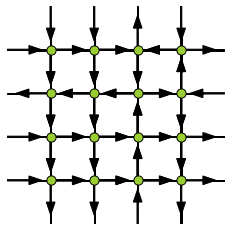

In [32]:
visualise_2d_model(arr)

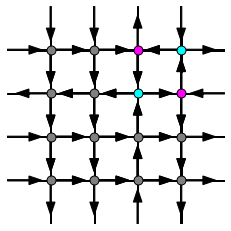

In [33]:
visualise_atom_config_with_bonds(arr)

In [74]:
# brr = calculate_atom_config(arr)

In [75]:
# brr

In [76]:
# crr = np.zeros_like(brr)

In [77]:
# 10 - 5 is Even, 6 is Odd
# 20 - 5 is Odd, 6 is Even
# 30 - ELSE

In [78]:
# crr

In [79]:
# n=len(brr)
# for i in range(n):
#     for j in range(n):
#         if brr[i][j]==5 and j%2==0:         # Is 5 Even,
#             if brr[i][(j+1)%n]==6:               #AND is right cell 6?
#                                                  #If yes,
#                 crr[i][j]=10                         #Current cell will be 10
#                 crr[i][(j+1)%n]=10                   #Right Cell will be 10
#                 if brr[i][(j-1)%n]==6:               #Is left cell 6?
#                     crr[i][(j-1)%n]=10                   #If yes, then left cell becomes 10
#                 else:
#                     crr[i][(j-1)%n]=30                   #If not, left cell becomes 30
#             else:                                #If not, i.e if right cell is not 6,
#                 if brr[i][(j-1)%n]==6:               #Is left cell 6?
#                     crr[i][j]=10                         #If yes, current
#                     crr[i][(j-1)%n]=10                      #and left cell are 10
#                     crr[i][(j+1)%n]=30                      #But
#                 else:
#                     crr[i][j]=30
#                     crr[i][(j+1)%n]=30
#                     crr[i][(j+1)%n]=30
                    
#         if brr[i][j]==5 and j%2==1:         # Is 5 Odd,
#             if brr[i][(j+1)%n]==6:               #AND is right cell 6?
#                                                  #If yes,
#                 crr[i][j]=20                         #Current cell will be 10
#                 crr[i][(j+1)%n]=20                   #Right Cell will be 10
#                 if brr[i][(j-1)%n]==6:               #Is left cell 6?
#                     crr[i][(j-1)%n]=20                   #If yes, then left cell becomes 10
#                 else:
#                     crr[i][(j-1)%n]=30                   #If not, left cell becomes 30
#             else:                                #If not, i.e if right cell is not 6,
#                 if brr[i][(j-1)%n]==6:               #Is left cell 6?
#                     crr[i][j]=20                         #If yes, current
#                     crr[i][(j-1)%n]=20                      #and left cell are 10
#                     crr[i][(j+1)%n]=30                      #But
#                 else:
#                     crr[i][j]=30
#                     crr[i][(j+1)%n]=30
#                     crr[i][(j+1)%n]=30
#         if brr[i][j]==1 or brr[i][j]==2 or brr[i][j]==3 or brr[i][j]==4:
#             crr[i][j]=30

In [81]:
# crr

In [82]:
def get_toon_array(arr):
    #COLOR CODES
    # 10 - 5 is Even, 6 is Odd
    # 20 - 5 is Odd, 6 is Even
    # 30 - ELSE
    n=len(arr)
    config_array = calculate_atom_config(arr)
    color_code_arr = np.zeros_like(config_array)
    for i in range(n):
        for j in range(n):
            if config_array[i][j]==5 and j%2==0:         # Is 5 Even,
                if config_array[i][(j+1)%n]==6:               #AND is right cell 6?
                                                     #If yes,
                    color_code_arr[i][j]=10                         #Current cell will be 10
                    color_code_arr[i][(j+1)%n]=10                   #Right Cell will be 10
                    if config_array[i][(j-1)%n]==6:               #Is left cell 6?
                        color_code_arr[i][(j-1)%n]=10                   #If yes, then left cell becomes 10
                    else:
                        color_code_arr[i][(j-1)%n]=30                   #If not, left cell becomes 30
                else:                                #If not, i.e if right cell is not 6,
                    if config_array[i][(j-1)%n]==6:               #Is left cell 6?
                        color_code_arr[i][j]=10                         #If yes, current
                        color_code_arr[i][(j-1)%n]=10                      #and left cell are 10
                        color_code_arr[i][(j+1)%n]=30                      #But
                    else:
                        color_code_arr[i][j]=30
                        color_code_arr[i][(j+1)%n]=30
                        color_code_arr[i][(j+1)%n]=30

            if config_array[i][j]==5 and j%2==1:         # Is 5 Odd,
                if config_array[i][(j+1)%n]==6:               #AND is right cell 6?
                                                     #If yes,
                    color_code_arr[i][j]=20                         #Current cell will be 10
                    color_code_arr[i][(j+1)%n]=20                   #Right Cell will be 10
                    if config_array[i][(j-1)%n]==6:               #Is left cell 6?
                        color_code_arr[i][(j-1)%n]=20                   #If yes, then left cell becomes 10
                    else:
                        color_code_arr[i][(j-1)%n]=30                   #If not, left cell becomes 30
                else:                                #If not, i.e if right cell is not 6,
                    if config_array[i][(j-1)%n]==6:               #Is left cell 6?
                        color_code_arr[i][j]=20                         #If yes, current
                        color_code_arr[i][(j-1)%n]=20                      #and left cell are 10
                        color_code_arr[i][(j+1)%n]=30                      #But
                    else:
                        color_code_arr[i][j]=30
                        color_code_arr[i][(j+1)%n]=30
                        color_code_arr[i][(j+1)%n]=30
            if config_array[i][j]==1 or config_array[i][j]==2 or config_array[i][j]==3 or config_array[i][j]==4:
                color_code_arr[i][j]=30
    return color_code_arr

In [84]:
def visualise_toon(arr,title="",savefig=False,savename=".temp",show=True):
    crr = get_toon_array(arr)
    colordict = {10:-1,20:1,30:0}
    crr_copy = np.copy(crr)
    for key, val in colordict.items(): crr_copy[crr==key] = val
    flipped_arr = np.flip(crr_copy,0)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    ax.set_aspect('equal')
    cmap = plt.get_cmap("PRGn")
    norm = clr.Normalize(vmin=-1.5, vmax=1.5)
    hexlist = [clr.to_hex(cmap(norm(-1))),clr.to_hex(cmap(norm(0))),clr.to_hex(cmap(norm(1)))]

    legend_elements = [
                    Line2D([0], [0], marker='o', color='w', label='Other',markerfacecolor=hexlist[1], markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='5 is Even AND 6 is Odd',markerfacecolor=hexlist[0], markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='5 is Odd AND 6 is Even',markerfacecolor=hexlist[2], markersize=10)
                        ]
    ax.pcolormesh(flipped_arr,cmap=cmap,norm=norm)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])

    ax.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(title)
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()

******* TEMP = 0.001 *******


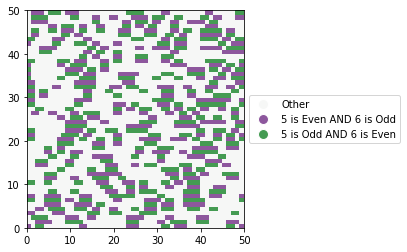

******* TEMP = 0.22311111111111112 *******


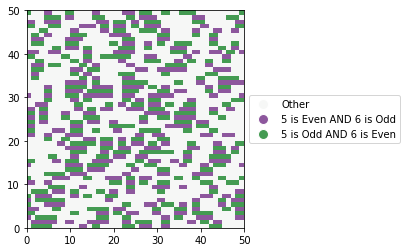

******* TEMP = 0.44522222222222224 *******


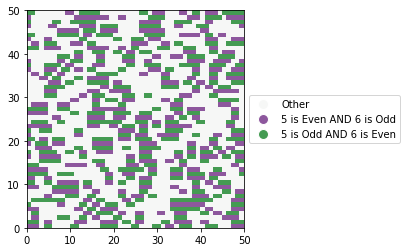

******* TEMP = 0.6673333333333333 *******


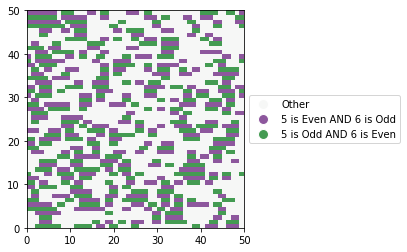

******* TEMP = 0.8894444444444445 *******


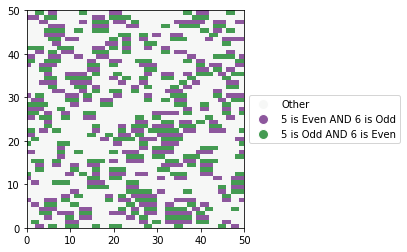

******* TEMP = 1.1115555555555554 *******


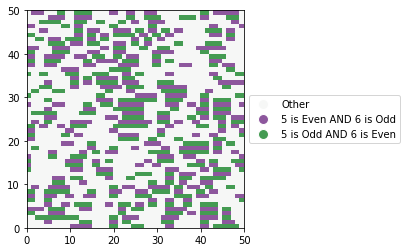

******* TEMP = 1.3336666666666666 *******


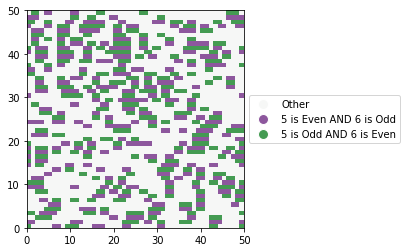

******* TEMP = 1.5557777777777777 *******


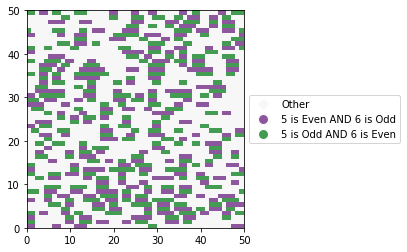

******* TEMP = 1.7778888888888889 *******


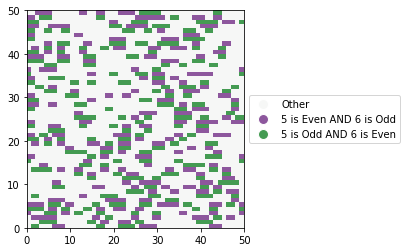

******* TEMP = 2.0 *******


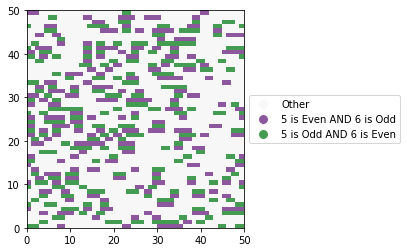

In [89]:
temp_arr=np.linspace(0.001,2,10)
for temp in temp_arr:
    print(f"******* TEMP = {temp} *******")
    arr2 = equilibrate(50,temp=temp)
    title=f"T = {temp} K"
    visualise_toon(arr2)

******* TEMP = 0.001 *******


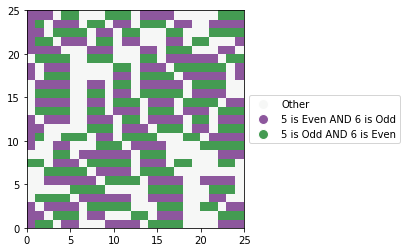

******* TEMP = 1.1119999999999999 *******


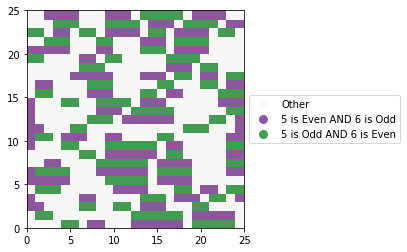

******* TEMP = 2.223 *******


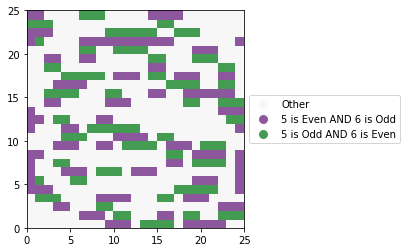

******* TEMP = 3.334 *******


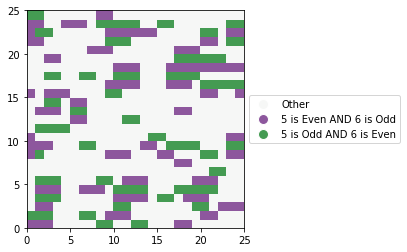

******* TEMP = 4.445 *******


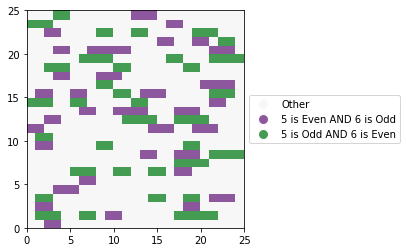

******* TEMP = 5.556 *******


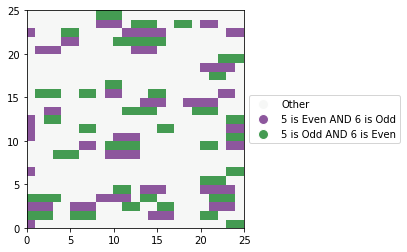

******* TEMP = 6.667000000000001 *******


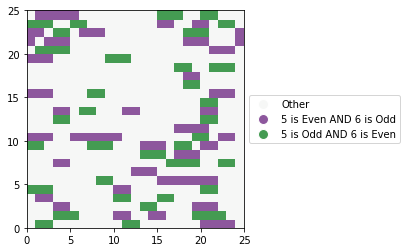

******* TEMP = 7.7780000000000005 *******


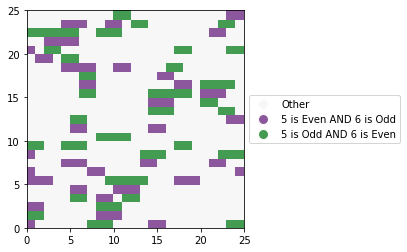

******* TEMP = 8.889 *******


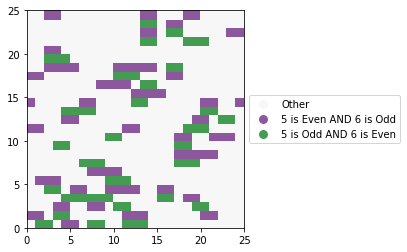

******* TEMP = 10.0 *******


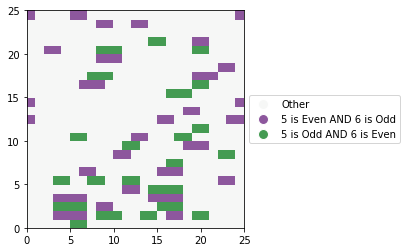

In [86]:
temp_arr=np.linspace(0.001,10,10)
for temp in temp_arr:
    print(f"******* TEMP = {temp} *******")
    arr2 = equilibrate(25,temp=temp)
    title=f"T = {temp} K"
    visualise_toon(arr2)

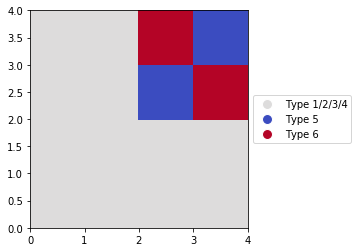

In [34]:
visualise_final_state(arr)

In [205]:
def save_equilibration_snapshots(n,temp_min=0.001,temp_max=15,n_points=50,verbose=False):
    temp_arr=np.linspace(temp_min,temp_max,n_points)
    if verbose:
        print(f" TEMP = {temp} *******")
    for temp in temp_arr:
        arr2 = equilibrate(n,temp=temp)        
        title=f"T = {temp} K"
        visualise_final_state(arr2,title=title,savefig=True,savename=title)

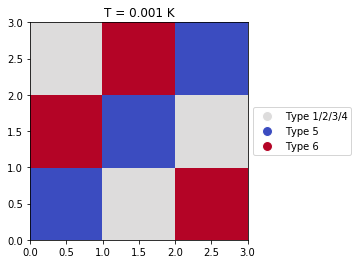

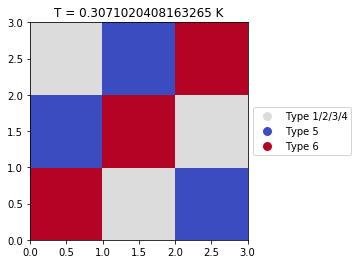

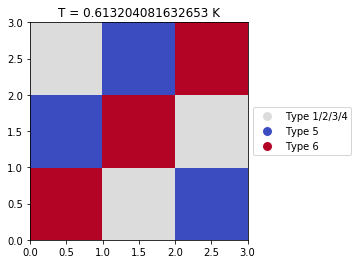

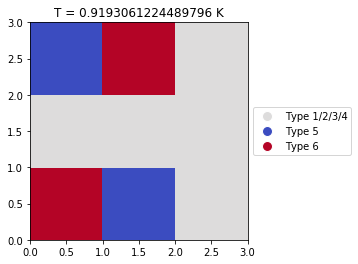

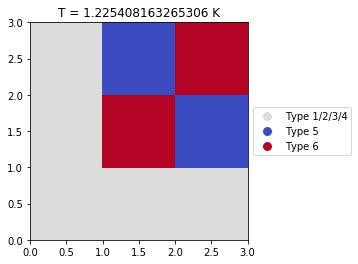

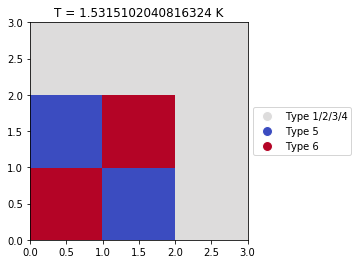

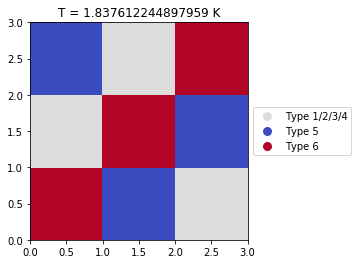

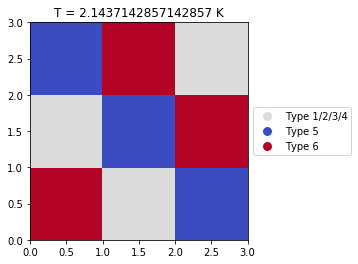

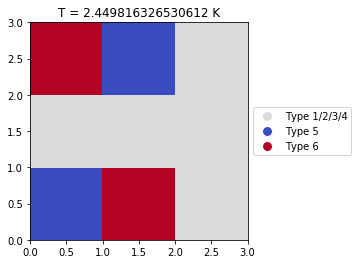

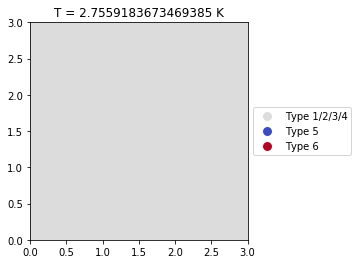

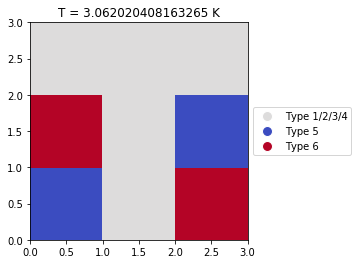

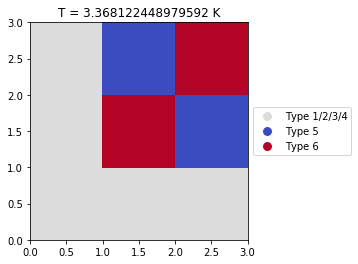

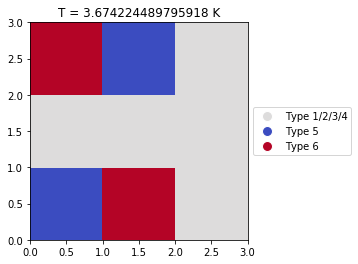

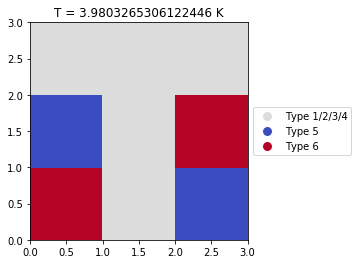

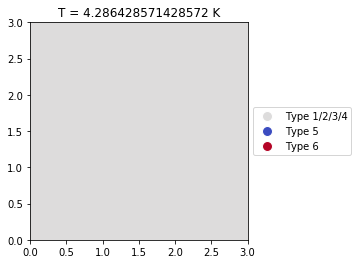

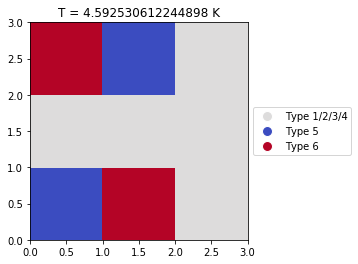

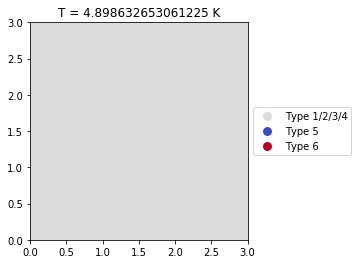

KeyboardInterrupt: 

In [208]:
save_equilibration_snapshots(3)

In [ ]:
plt.rc('text', usetex=True)
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 2.8))
axs[0].scatter(temperature,ene,linestyle='-', marker='.', color='m',s = 5)
axs[1].scatter(temperature,mag,linestyle='-', marker='.', color='c', s = 5)

#axs[0].text(245, 0.95, " $\gamma = 0.15 $", size=8,
#         ha="right", va="top",
#         bbox=dict(fc="none"))
#axs[1].text(3.1, 0.97, " $\gamma = 0.15 $", size=8,
#         ha="right", va="top",
#         bbox=dict(fc="none"))

axs[0].set_ylabel( r'Energy', rotation=90, fontsize = 17)
axs[1].set_ylabel( r'Magnetization', rotation=90, labelpad = 12, fontsize = 17)
axs[0].set_xlabel( r'Temperature(K)', rotation=0, fontsize = 14)
axs[1].set_xlabel( r'Temperature(K)', rotation=0, fontsize = 14)
plt.savefig('2D_Ising_EandM.jpg')


In [ ]:
temp_arr=np.linspace(0.001,15,200)
for temp in temp_arr:
    print(f"******* TEMP = {temp} *******")
    arr2 = equilibrate(25,temp=temp)
    percent_occ = -calculate_energy(arr2,eps=1)/(len(arr2)*len(arr2))*100
    print(f"Total RedBlue = {percent_occ} %")
    title=f"T = {temp} K"
    visualise_final_state(arr2,title=title,savefig=True,savename=title)

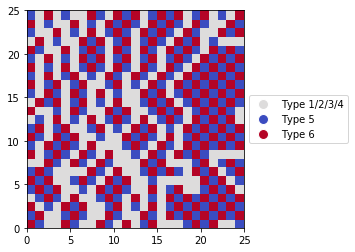

In [56]:
arr2 = equilibrate(25,temp=0.1)
# visualise_atom_config_with_bonds(arr2)
visualise_final_state(arr2)

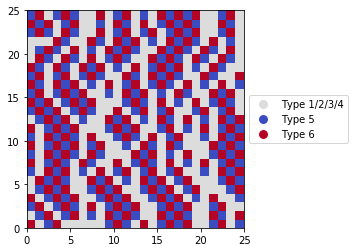

In [68]:
arr2 = equilibrate(25,temp=0.1)
# visualise_atom_config_with_bonds(arr2)
visualise_final_state(arr2)

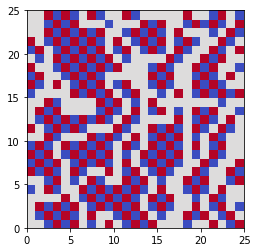

In [115]:
arr2 = equilibrate(25,temp=1)
# visualise_atom_config_with_bonds(arr2)
visualise_final_state(arr2)

In [ ]:
temp_arr=np.linspace(0.1,4.5,10)

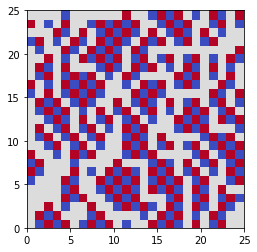

In [114]:
arr2 = equilibrate(25,temp=1)
# visualise_atom_config_with_bonds(arr2)
visualise_final_state(arr2)

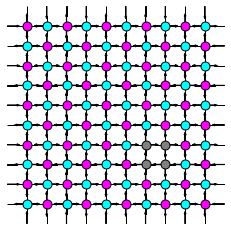

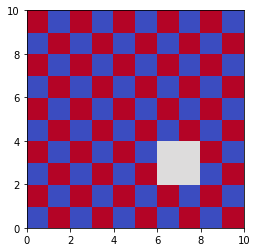

In [104]:
arr2 = equilibrate(10,temp=0.15)
visualise_atom_config_with_bonds(arr2)
visualise_final_state(arr2)

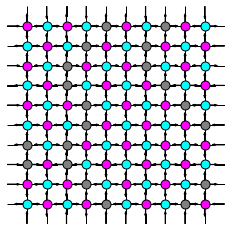

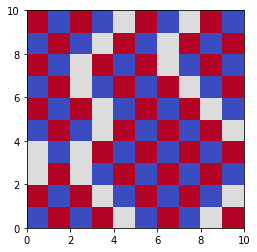

In [109]:
arr2 = equilibrate(10,temp=0.2)
visualise_atom_config_with_bonds(arr2)
visualise_final_state(arr2)

In [ ]:
arr2 = equilibrate(10,temp=0.2)
visualise_atom_config_with_bonds(arr2)
visualise_final_state(arr2)

In [92]:
temp_arr=np.linspace(0.1,4.5,20)
sp_heat=[]
energy_list=[]
for temp in temp_arr:
    print(f"******* TEMP = {temp} *******")
    sp,en = get_sp_heat_and_energy(n=3,temp=temp,breaking_iters=4000)
    sp_heat.append(sp)
    energy_list.append(en)
    

******* TEMP = 0.1 *******
******* TEMP = 0.3315789473684211 *******
******* TEMP = 0.5631578947368422 *******
******* TEMP = 0.7947368421052632 *******
******* TEMP = 1.0263157894736843 *******
******* TEMP = 1.2578947368421054 *******
******* TEMP = 1.4894736842105265 *******
******* TEMP = 1.7210526315789476 *******
******* TEMP = 1.9526315789473687 *******
******* TEMP = 2.18421052631579 *******
******* TEMP = 2.4157894736842107 *******
******* TEMP = 2.647368421052632 *******
******* TEMP = 2.878947368421053 *******
******* TEMP = 3.1105263157894742 *******
******* TEMP = 3.342105263157895 *******


KeyboardInterrupt: 

In [66]:
sp_heat

[0.0,
 0.0,
 0.3503459787851437,
 0.12075025949154385,
 0.03797501643655483,
 0.06951909105232765,
 0.21353460941369376,
 0.03209519088990509,
 0.10029453433206671,
 0.062407741810616035,
 0.023600482878538376,
 0.0774671783744188,
 0.008579658737240854,
 0.04444272662984814,
 0.03571577489821648,
 0.020755001543608192,
 0.026209280738415327,
 0.028023074826601664,
 0.030392481513184674,
 0.0303670781893004]

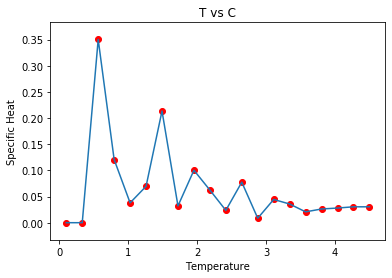

In [67]:
plt.scatter(temp_arr,sp_heat,c="red")
plt.plot(temp_arr,sp_heat)
plt.xlabel("Temperature")
plt.ylabel("Specific Heat")
plt.title("T vs C")
plt.show()


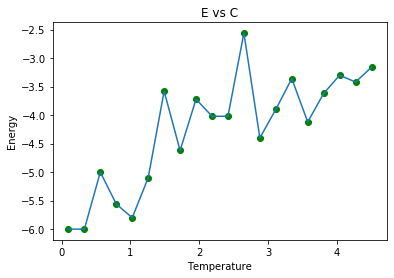

In [69]:
plt.scatter(temp_arr,energy_list,c="green")
plt.plot(temp_arr,energy_list)
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.title("E vs C")
plt.show()


In [205]:
# def get_spec_heat(arr,temperature,energy,eps=1):#eps is energy for config 5
#     '''
#     Author: Vinay Patil
#     ~Function Description~
#     '''
# #     kb=1.38064 *10**(-23)
#     kb=1
#     diversion=np.zeros(n)
#     energy_div=np.zeros(n)
#     spec_heat=np.zeros(n)
#     n=len(temperature)
#     N=len(arr)

#     for i in range(n):
#         if i==0:
#             spec_heat[i]=abs(energy[i+1]-energy[i])/h #O(h) differentiation at the end points
#         elif i==n-1:
#             spec_heat[i]=abs(energy[i]-energy[i-1])/h #O(h) differentiation at the end points
#         else:
#             spec_heat[i]=abs((energy[i+1]-energy[i-1])/2*h) #O(h^2) differentiation
#             diversion[i]=abs((spec_heat[i]/N**2)-kb*((ln2)**2)*(28/45))
#             energy_div[i]=abs((energy[i]/N**2)-(eps/3))

#     minpos = diversion.index(min(diversion))
#     print("The critical temp found is at",temp_plot[minpos]) #ye minpos +1 kar
#     print("The error in Specific Heat per vertex is",min(diversion))                                
#     plt.scatter(temperature, spec_heat)
#     plt.plot(temperature, spec_heat)
#     plt.xlabel("Temperature")
#     plt.ylabel("Specific Heat")
#     plt.title("T vs C")
#     plt.show()
#     return spec_heat

## ERROR MODELLING: TRUE AND APPROX ERROR COMPARISONS FOR N=1,2,3,4,5

In [33]:
true_val_dict = {1:4,2:18,3:148,4:2940,5:142815}

In [23]:
def count_states_err(num,error_threshold,return_dict = False,verbose=False):
    true_err_list = []
    approx_err_list = []
    if not (error_threshold<=100 and error_threshold>0):
        print("Error! Please input error_threshold as a value between 0 and 100")
        assert (error_threshold<=100 and error_threshold>0)
    state_dict={}
    oldarr = long_loop(initialise_state(num), verbose=False)
    good_iterations = 0           #Iterations that gave us a new state, so good.
    bad_iterations = 0               #Iterations that gave us an already found state,so a waste and hence bad.
    while True:
        newarr = long_loop(oldarr,verbose=False)
        name =arr_to_string(newarr)
        if name not in state_dict:
            count_repetitions=0
            state_dict[name]=1
            good_iterations+=1
        else:
            bad_iterations+=1
            count_repetitions+=1
            state_dict[name]+=1
        percent_approx_err=good_iterations*100/(good_iterations+bad_iterations)
        if verbose:
            print(f"Good iterations = {good_iterations} and bad iterations = {bad_iterations} and Error % = {percent_approx_err}", end="\r",flush=True)
        true_err_list.append((true_val_dict[num] - good_iterations)*100/true_val_dict[num])
        approx_err_list.append(percent_approx_err)
        if percent_approx_err < error_threshold:
            break
        oldarr=newarr
    if return_dict:
        return len(state_dict),state_dict,true_err_list,approx_err_list
    else:
        return len(state_dict),true_err_list,approx_err_list

In [ ]:
count_states_err(4,5,verbose=True)

In [28]:
errorlistdict={}
for n in true_val_dict.keys():
    t1=time.process_time()
    print(f"************ N = {n} ************")
    cnt, true_err_list,approx_err_list = count_states_err(n,5)
    errorlistdict[n]=[true_err_list,approx_err_list]
    t2=time.process_time()
    print(f"Completed in {t2-t1} seconds.")

************ N = 1 ************
Completed in 0.0 seconds.
************ N = 2 ************
Completed in 0.03125 seconds.
************ N = 3 ************
Completed in 0.453125 seconds.
************ N = 4 ************
Completed in 13.65625 seconds.
************ N = 5 ************
Completed in 885.5 seconds.


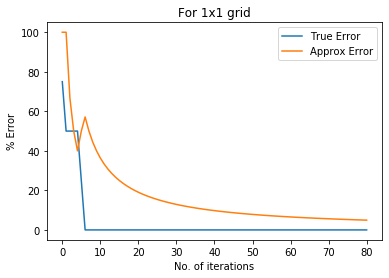

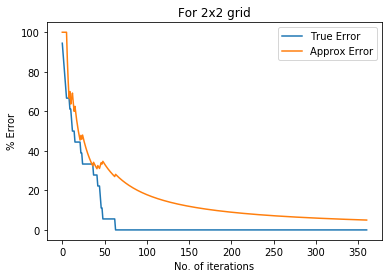

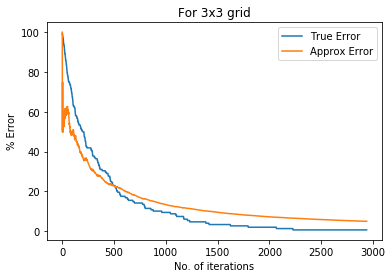

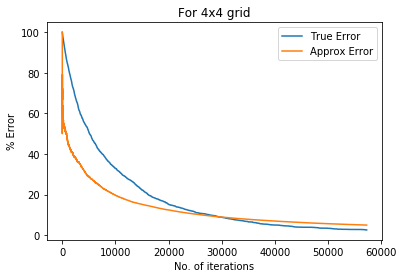

C:\Users\Sid\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


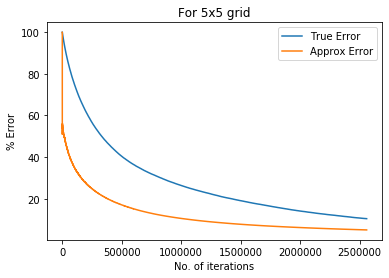

In [29]:
for n in errorlistdict.keys():
    true=errorlistdict[n][0]
    approx=errorlistdict[n][1]
    plt.plot(true, label='True Error')
    plt.plot(approx, label='Approx Error')
    plt.legend()
    plt.title(f"For {n}x{n} grid")
    plt.xlabel("No. of iterations")
    plt.ylabel("% Error")
    plt.show()